In [ ]:
!pip install kaggle

# all import

In [46]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# get data

In [3]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset. Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [35]:
import os
from IPython.display import FileLink


FileLink('retail.csv')

C:\Users\asus\Desktop\MoshinLerninHomeWork\class p\retail.csv

In [47]:
df = pd.read_csv('titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# data cleaning

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
print(df['Age'].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [50]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [51]:
df = df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'])

In [52]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = np.ceil(df['Age'])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## cheang data type

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    uint8  
 1   Pclass    891 non-null    uint8  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    uint8  
 4   Fare      891 non-null    float32
 5   Embarked  891 non-null    uint8  
dtypes: float32(1), uint8(5)
memory usage: 8.0 KB


In [64]:
print(df['Embarked'].unique())
#print(np.unique(pred, return_counts=True))

[0 1 2]


In [65]:
print(df['Age'].min())
print(df['Age'].max())

1
80


In [56]:
print(df['Sex'].unique())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

['male' 'female']


S: Southampton (بندر اصلی)
C: Cherbourg (فرانسه)
Q: Queenstown (ایرلند)

In [57]:
df['Fare'] = df['Fare'].astype('float32')

U8 = ['Age','Pclass','Sex','Survived','Embarked']
for i in U8:
    df[i] = df[i].astype('uint8')



# mashin lerning

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

Accuracy:(78.2%)


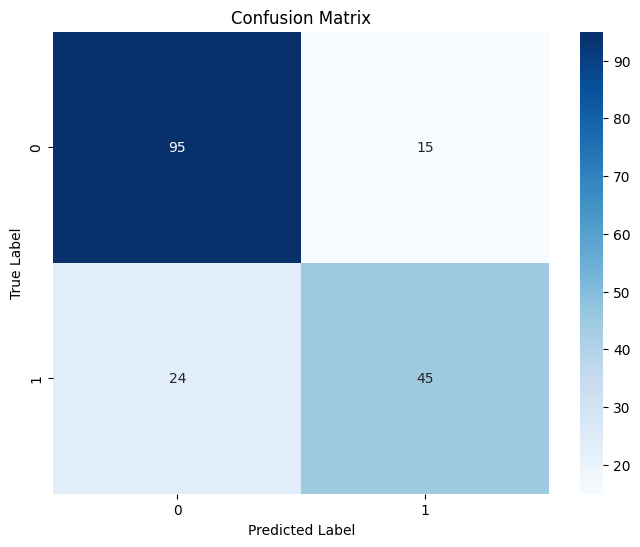

In [94]:
from sklearn.linear_model import  LogisticRegression

X = df.drop('Survived', axis=1)  
y = df['Survived'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(f"Accuracy:({accuracy*100:.1f}%)")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()